In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [3]:
X = np.array([[0,0],[0,1],[1,0],[1,1]])
y = np.array([[0],[1],[1],[0]])

In [4]:
def sigmoid(x): return 1 / (1 + np.exp(-x))
def sigmoid_deriv(x): return x * (1 - x)

def relu(x): return np.maximum(0, x)
def relu_deriv(x): return (x > 0).astype(float)

In [5]:

# Training function
def train_MLP(X, y, hidden_activation="sigmoid", lr=0.1, epochs=5000):
    np.random.seed(42)
    n_input, n_hidden, n_output = 2, 2, 1

    # Weight initialization
    W1 = np.random.randn(n_input, n_hidden)
    b1 = np.zeros((1, n_hidden))
    W2 = np.random.randn(n_hidden, n_output)
    b2 = np.zeros((1, n_output))

    # Select activation
    act = sigmoid if hidden_activation=="sigmoid" else relu
    act_deriv = sigmoid_deriv if hidden_activation=="sigmoid" else relu_deriv

    for epoch in range(epochs):
        # Forward pass
        z1 = np.dot(X, W1) + b1
        a1 = act(z1)
        z2 = np.dot(a1, W2) + b2
        y_hat = sigmoid(z2)

        # Loss (MSE)
        loss = np.mean((y - y_hat) ** 2)

        # Backpropagation
        d_loss = (y_hat - y) * sigmoid_deriv(y_hat)
        dW2 = np.dot(a1.T, d_loss)
        db2 = np.sum(d_loss, axis=0, keepdims=True)

        d_hidden = np.dot(d_loss, W2.T) * act_deriv(a1)
        dW1 = np.dot(X.T, d_hidden)
        db1 = np.sum(d_hidden, axis=0, keepdims=True)

        # Weight updates
        W1 -= lr * dW1
        b1 -= lr * db1
        W2 -= lr * dW2
        b2 -= lr * db2

    return W1, b1, W2, b2, loss

In [6]:
# Prediction
def predict(X, W1, b1, W2, b2, activation="sigmoid"):
    act = sigmoid if activation=="sigmoid" else relu
    z1 = np.dot(X, W1) + b1
    a1 = act(z1)
    z2 = np.dot(a1, W2) + b2
    return sigmoid(z2)

In [7]:
# Train
W1, b1, W2, b2, loss = train_MLP(X, y, hidden_activation="sigmoid", lr=0.1, epochs=5000)
y_pred = predict(X, W1, b1, W2, b2, "sigmoid")

In [8]:
# Convert to binary
y_pred_class = (y_pred > 0.5).astype(int)

In [9]:
# Evaluation metrics from scratch
TP = np.sum((y==1) & (y_pred_class==1))
TN = np.sum((y==0) & (y_pred_class==0))
FP = np.sum((y==0) & (y_pred_class==1))
FN = np.sum((y==1) & (y_pred_class==0))

accuracy = (TP+TN) / len(y)
precision = TP / (TP+FP+1e-8)
recall = TP / (TP+FN+1e-8)
f1 = 2 * precision * recall / (precision+recall+1e-8)

print("Predictions:", y_pred_class.ravel())
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}, Recall: {recall:.2f}, F1: {f1:.2f}")

Predictions: [0 0 1 1]
Accuracy: 0.50
Precision: 0.50, Recall: 0.50, F1: 0.50


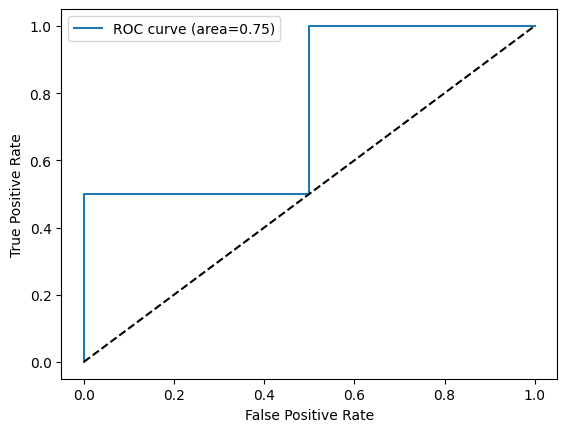

In [10]:
# ROC Curve
fpr, tpr, _ = roc_curve(y, y_pred)
roc_auc = auc(fpr, tpr)

plt.plot(fpr, tpr, label=f"ROC curve (area={roc_auc:.2f})")
plt.plot([0,1],[0,1],'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()